In [1]:
#import pandas as pd
from visualizations import *
from simulations import *

#import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("https://data.cdc.gov/api/views/q9mh-h2tw/rows.csv?accessType=DOWNLOAD")

In [24]:
df_new = df[(df["County Name"] == "Montgomery County, Alabama")|(df["County Name"] == "Multnomah County, Oregon")]

In [27]:
df_new.reset_index(drop = True, inplace = True)

In [32]:
df_new.iloc[[1],:].to_csv("../data/multnomah_county_or_hesitancy.csv")

In [4]:
with open('../../vaccine_opinions/data/{}/config.txt'.format("Alabama")) as json_file:
    state_dict = json.load(json_file)

state_dict

{'state': 'Alabama',
 'capital_county': 'Montgomery County',
 'governor_hesitancy': 3,
 'governor_partisan_proportion': 0.52,
 'capital_lon': -9595730.288001092,
 'capital_lat': 3785280.816418478,
 'pct_weakly_hes': 0.23,
 'pct_strongly_hes': 0.13}

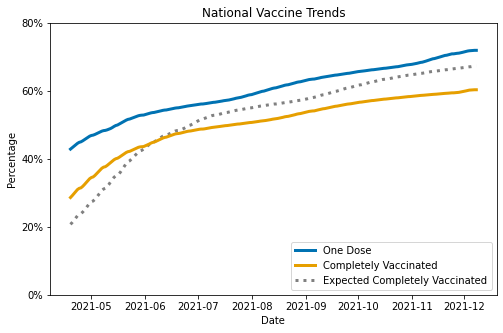

In [2]:
national_vaccine_trends_chart()

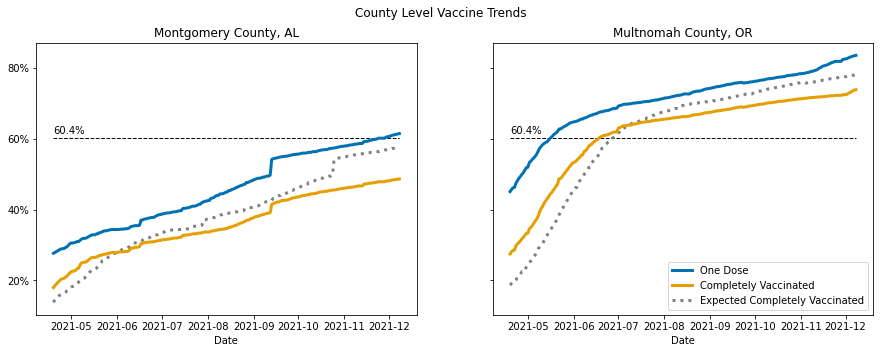

In [5]:
county_vaccine_trends_chart(download_data = False)

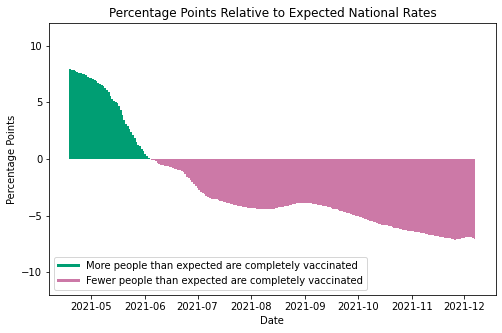

In [4]:
national_vaccine_expectation_chart()

In [5]:
diff = complete - expected
diff_weekly = pd.DataFrame(index = pd.date_range(diff.index[0],diff.index[-1], freq = "W"),
                             columns = ["mean"])

for i in range(diff.shape[0]-1):
        start = diff.index[i]
        end = diff.index[i+1]
        diff_weekly.loc[start,'mean'] = diff.loc[start:end].mean()

diff_weekly

NameError: name 'complete' is not defined

In [40]:
def load_county_data(county, state, download = False):
    c = county.lower()
    s = state.lower()
    
    if download == True:
        # Caution: this will take a long time.
        df = pd.read_csv("https://data.cdc.gov/api/views/8xkx-amqh/rows.csv?accessType=DOWNLOAD")
        df = df[(df["Recip_County"] == "{} County".format(county.capitalize())) & (df["Recip_State"] == state.upper())]

    else:
        df = pd.read_csv("../data/{}_county_{}_vaccination_trends.csv".format(c,s), index_col = 0)
    
    df["Date"] = [pd.to_datetime(d) for d in df["Date"]]
    df.sort_values(by = "Date", inplace = True)
    df.set_index("Date", drop = True, inplace = True)
    
    return df
        
df = load_county_data(county = "Multnomah", state= "OR", download = False)

In [46]:
df.columns

Index(['FIPS', 'MMWR_week', 'Recip_County', 'Recip_State',
       'Series_Complete_Pop_Pct', 'Series_Complete_Yes',
       'Series_Complete_12Plus', 'Series_Complete_12PlusPop_Pct',
       'Series_Complete_18Plus', 'Series_Complete_18PlusPop_Pct',
       'Series_Complete_65Plus', 'Series_Complete_65PlusPop_Pct',
       'Completeness_pct', 'Administered_Dose1_Recip',
       'Administered_Dose1_Pop_Pct', 'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18Plus',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65Plus',
       'Administered_Dose1_Recip_65PlusPop_Pct', 'SVI_CTGY',
       'Series_Complete_Pop_Pct_SVI', 'Series_Complete_12PlusPop_Pct_SVI',
       'Series_Complete_18PlusPop_Pct_SVI',
       'Series_Complete_65PlusPop_Pct_SVI', 'Metro_status',
       'Series_Complete_Pop_Pct_UR_Equity',
       'Series_Complete_12PlusPop_Pct_UR_Equity',
       'Series_Complete_18PlusPop_Pct_UR_Eq

In [55]:
def county_complete_pct(df):
    """ Returns timeseries of percentage completely vaccinated.
    """
    return df["Series_Complete_Pop_Pct"].loc[START_DATE:,]

def county_one_dose_pct(df):
    """ Returns timeseries of percentage with one dose.
    """
    return df['Administered_Dose1_Pop_Pct'].loc[START_DATE:,]

def county_expected_complete_pct(df):
    """ Returns timeseries of percentage expected completely vaccinated.
    """
    one_dose = df['Administered_Dose1_Pop_Pct']
    expected = one_dose.loc[START_DATE - timedelta(days = 42):one_dose.index[-1] - timedelta(days = 42)]
    expected = pd.Series(expected.values, index = pd.date_range(START_DATE, one_dose.index[-1]))
    
    return expected
county_expected_complete_pct(df)

2021-04-19    18.7
2021-04-20    19.2
2021-04-21    19.6
2021-04-22    19.6
2021-04-23    20.1
              ... 
2021-12-04    77.9
2021-12-05    77.9
2021-12-06    78.0
2021-12-07    78.0
2021-12-08    78.1
Freq: D, Length: 234, dtype: float64

In [16]:
df_us["Date"]

KeyError: 'Date'